In [60]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import random as rd
#from tqdm import tqdm
from glob import glob


In [62]:
#archivos=glob.glob("*.txt")
archivos=glob("*.txt")

In [63]:
archivos

['D2b27954678.txt',
 'D2b27954712.txt',
 'D2b27954812.txt',
 'D2b27955005.txt',
 'D2b27955172.txt',
 'D2b27955219.txt',
 'D2b27955375.txt',
 'D2b27955452.txt',
 'D2b27955710.txt',
 'D2b27955770.txt',
 'D2b27955905.txt',
 'D2b27955956.txt',
 'D2b27956035.txt',
 'D2b27956076.txt',
 'D2b27956084.txt',
 'D2b27956769.txt',
 'D2b27957040.txt',
 'D2b27957557.txt',
 'D2b27957563.txt',
 'D2b27957565.txt',
 'D2b27957796.txt',
 'D2b27957806.txt',
 'D2b27957887.txt',
 'D2b27958064.txt',
 'D2b27958215.txt',
 'D2b27958244.txt',
 'D2b27958463.txt',
 'D2b27958573.txt',
 'D2b27958866.txt',
 'D2b27958924.txt',
 'D2b27959001.txt',
 'D2b27959004.txt',
 'D2b27959255.txt',
 'D2b27959302.txt',
 'D2b27959450.txt',
 'D2b2795965.txt',
 'D2b27960076.txt',
 'D2b27960306.txt',
 'D2b27960319.txt',
 'D2b27960321.txt',
 'D2b27960624.txt',
 'D2b27960699.txt',
 'D2b27960721.txt',
 'D2b27961125.txt',
 'D2b27961481.txt',
 'D2b27961510.txt',
 'D2b27961552.txt',
 'D2b27961711.txt',
 'D2b27961794.txt',
 'D2b27962141.txt',
 

In [64]:
Tiempos=[]
Intensidad=[]
Error=[]
n=len(archivos)
i=0
while(i<n):
    Datos=np.loadtxt(archivos[i])
    Tiempos.append(Datos[:,0])
    Intensidad.append(Datos[:,1])
    Error.append(Datos[:,2])
    i=i+1

In [65]:
from astropy.timeseries import LombScargle
import random


In [66]:
#Definicion de la funcion de fase
def phi(t,t0,p):
    return (((t-t0)/p)-int((t-t0)/p))

In [67]:
Frecuencias=[]
Power=[]
Fap=[]
Periodo=[]
for i in range(n):
    frecuency=np.linspace(1/50,1/(0.05),100000)
    power = LombScargle(Tiempos[i], Intensidad[i], Error[i]).power(frecuency)
    max_power = power.max()
    fap = LombScargle(Tiempos[i], Intensidad[i], Error[i]).false_alarm_probability(max_power)
    Frecuencias.append(frecuency)
    Power.append(power)
    Fap.append(fap)

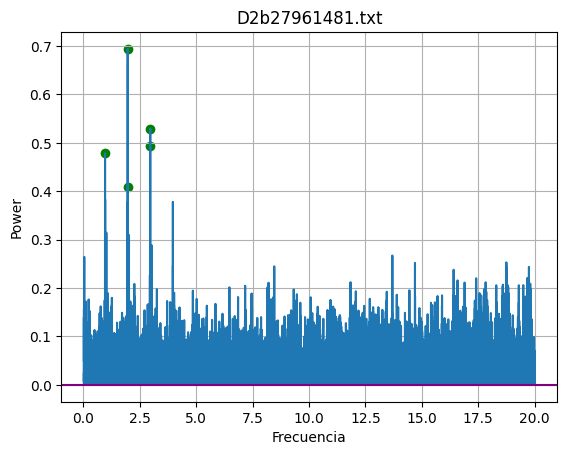

In [85]:
from scipy.signal import find_peaks
index = 44
plt.plot(Frecuencias[index],Power[index])
plt.axhline(Fap[index], color='purple', label='Fap')
plt.title(str(archivos[index]))
plt.xlabel('Frecuencia')
plt.ylabel('Power')
plt.grid()

peaks, _ = find_peaks(Power[index])

powerpeaks=Power[index][peaks]
power_order=np.sort(powerpeaks)[::-1]
n_peaks=5
ind_peaks=[]
Freq_peaks=[]
Power_peaks=[]
Periodo_peaks=[]
i=0
while(i<n_peaks):
    ind_peaks=np.where(Power[index]==power_order[i])[0][0]
    Freq_peaks.append(Frecuencias[index][ind_peaks])
    Periodo_peaks.append(1/Freq_peaks[-1])
    Power_peaks.append(Power[index][ind_peaks])
    i=i+1
plt.scatter(Freq_peaks,Power_peaks, color='g')

0.12733829835417168
0.25467659670834336
0.5093531934166867
1.0187063868333734
2.037412773666747


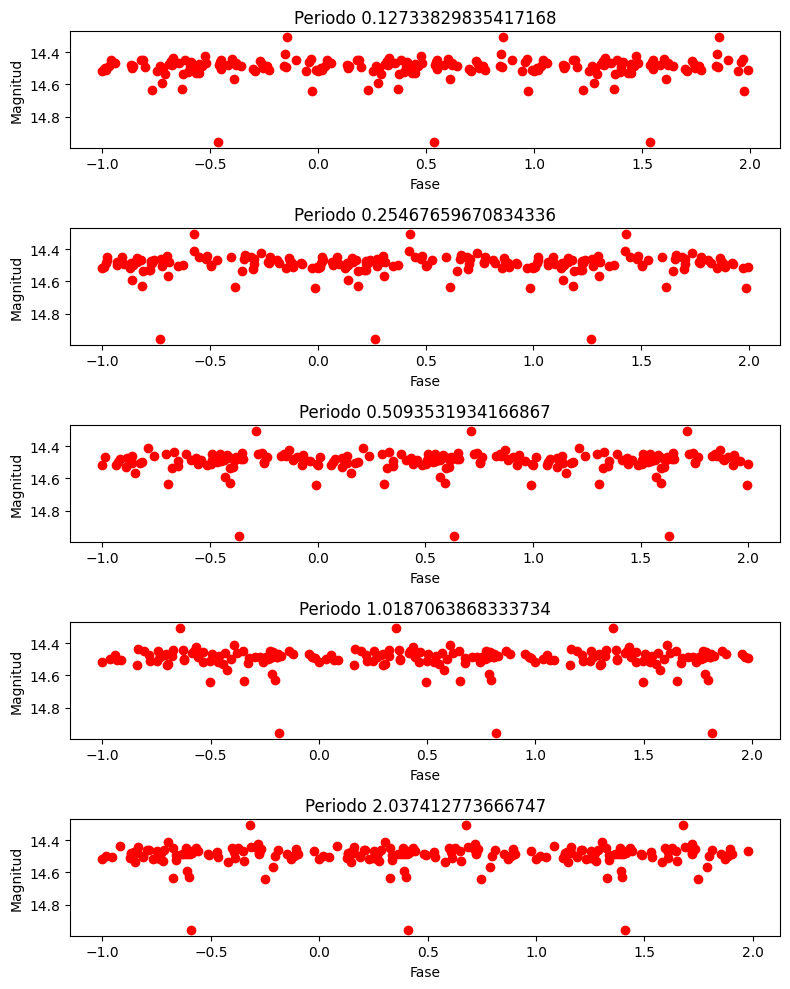

In [87]:
fig, axs = plt.subplots(n_peaks, figsize=(8, 10))  # Ajusta el tamaño de la figura según tu preferencia
a = 0
New_Periodos=np.array([Periodo_peaks[a]/4,Periodo_peaks[a]/2,Periodo_peaks[a],Periodo_peaks[a]*2,Periodo_peaks[a]*4])
for i_p, periodo in enumerate(New_Periodos):
    print(periodo)
    Tie = [phi(i, Tiempos[a][0], periodo) for i in Tiempos[a]]
    Tie=np.array(Tie)
    axs[i_p].scatter(Tie, Intensidad[a],c="r")
    axs[i_p].scatter(Tie+1, Intensidad[a],c="r")
    axs[i_p].scatter(Tie-1, Intensidad[a],c="r")
    axs[i_p].set_title('Periodo ' + str(periodo))
    axs[i_p].invert_yaxis()  # Voltea el eje y
    axs[i_p].set_xlabel('Fase')
    axs[i_p].set_ylabel('Magnitud')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()

In [17]:
#min(Power_peaks), Fap[1]
len(power_order)

25620

In [ ]:
k=[2,0,0,0,0,0,0,0,0,0]
pe_k=[1,2,1,1,1,1,1,1,1]

In [19]:


# Define the size of the list
size = len(archivos)
default_value = 0
 
# Create a list with the specified size filled with a default value using a for loop
k = [2]
for _ in range(size-1):
    k.append(default_value)
 
print(k)

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


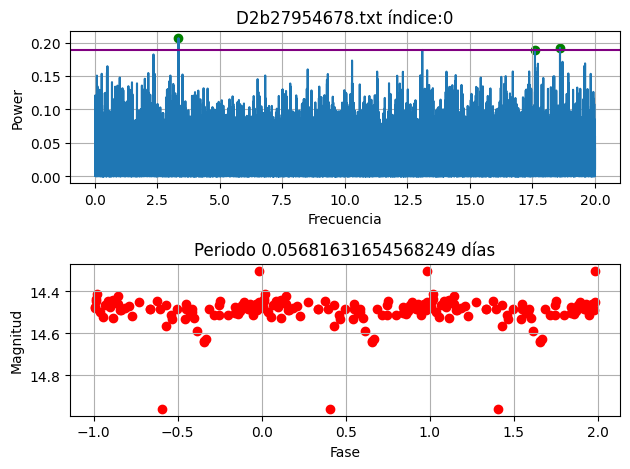

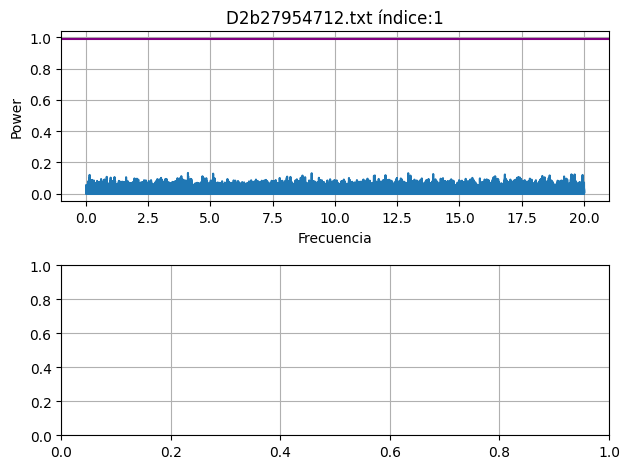

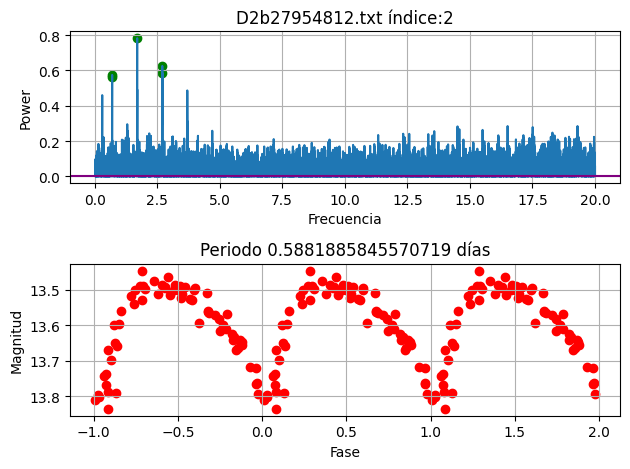

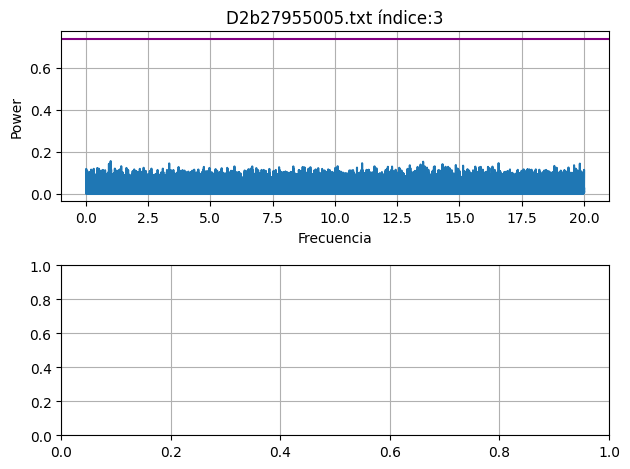

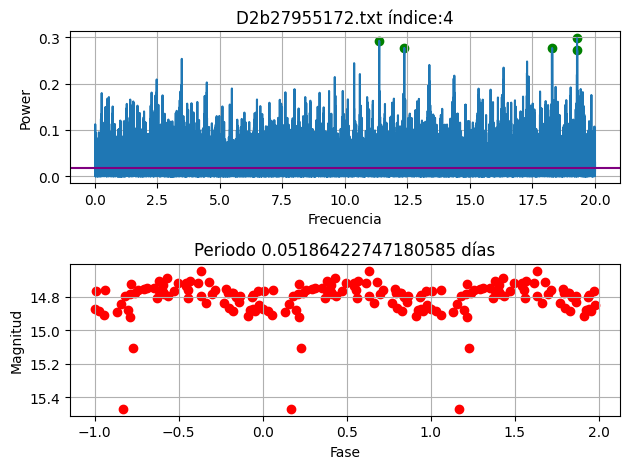

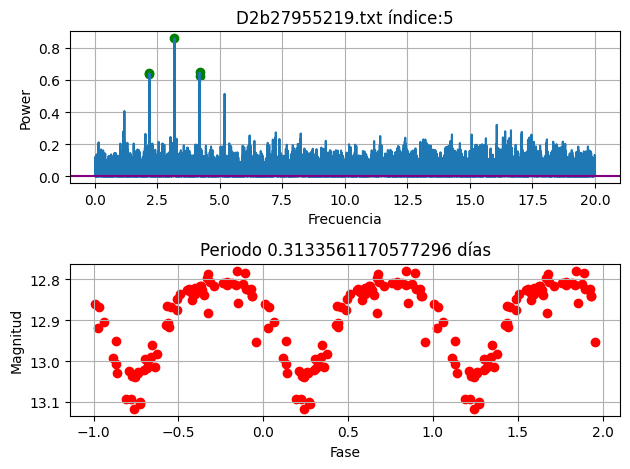

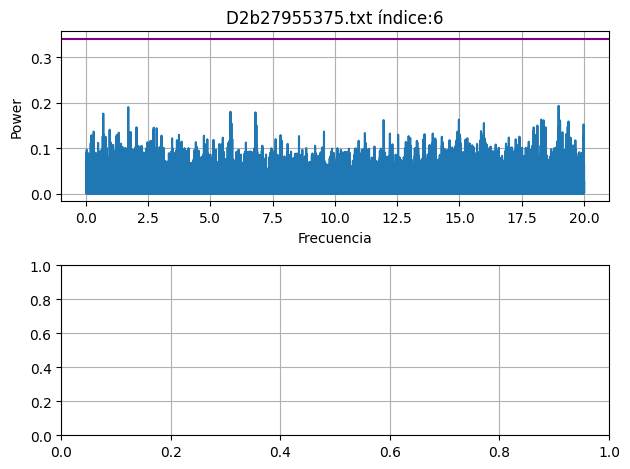

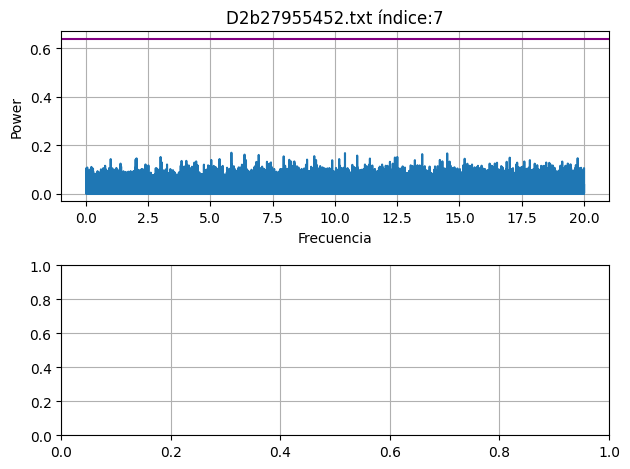

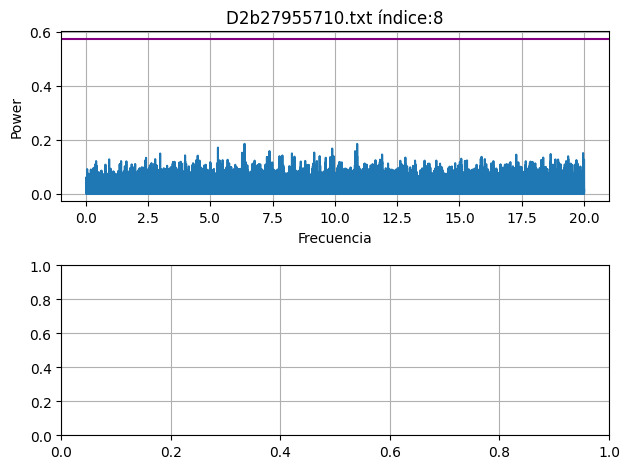

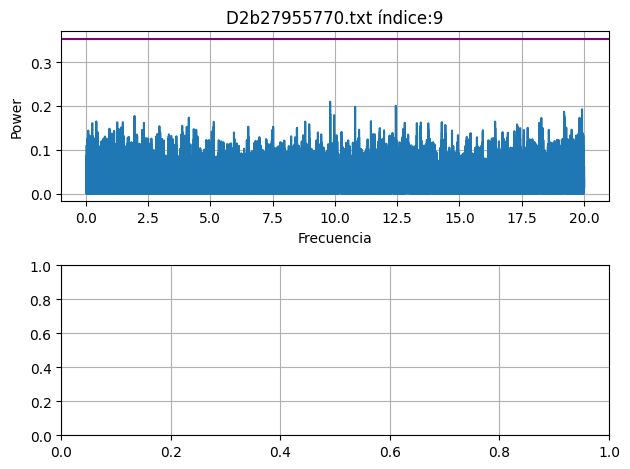

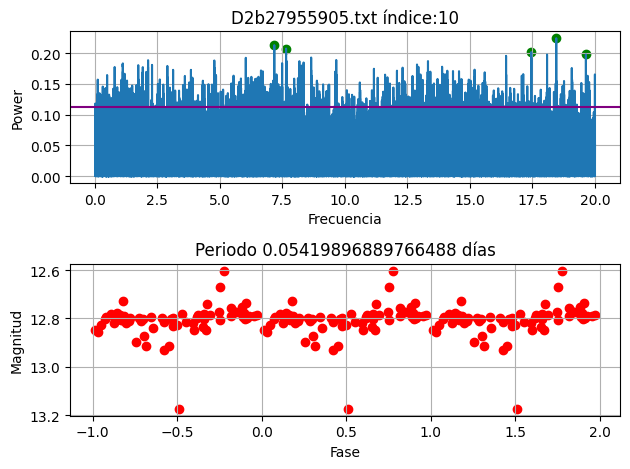

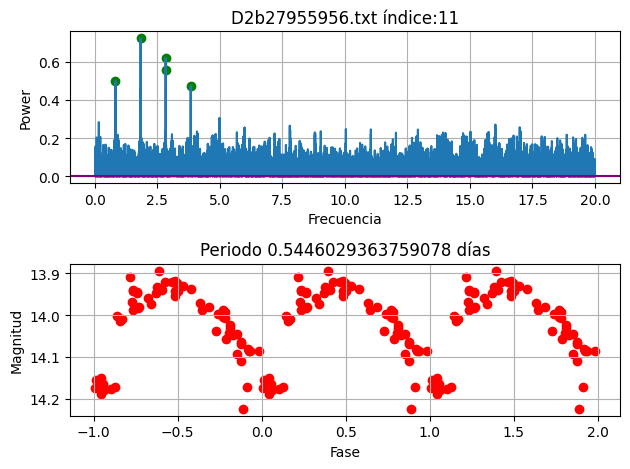

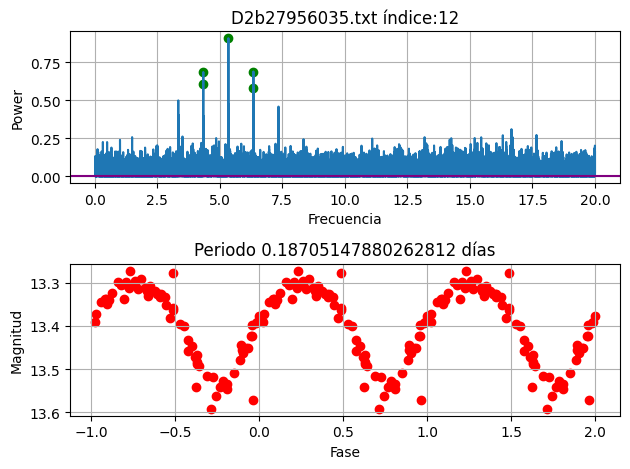

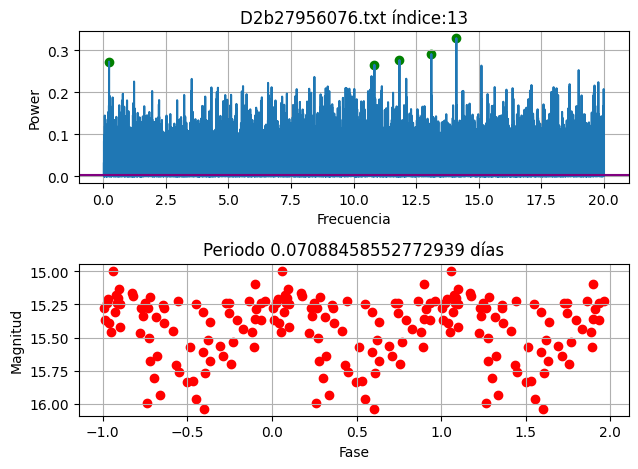

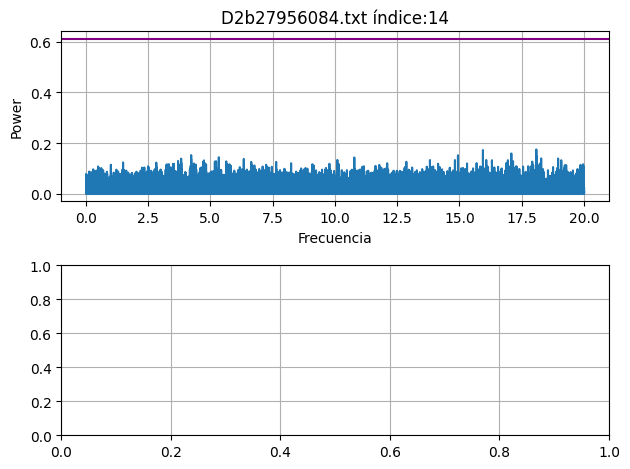

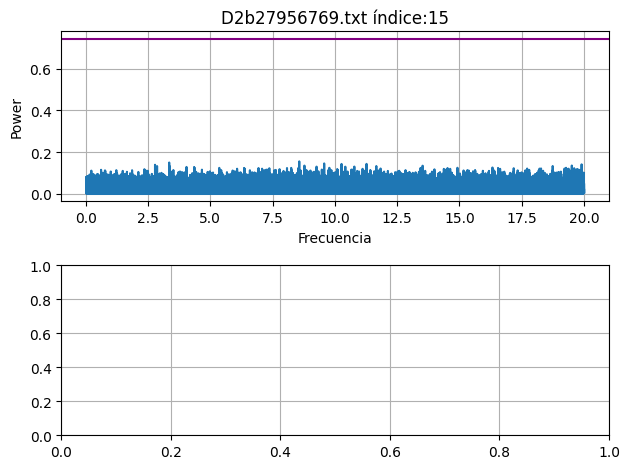

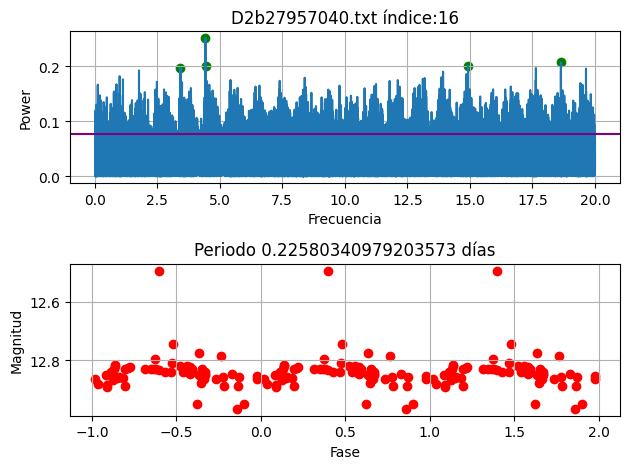

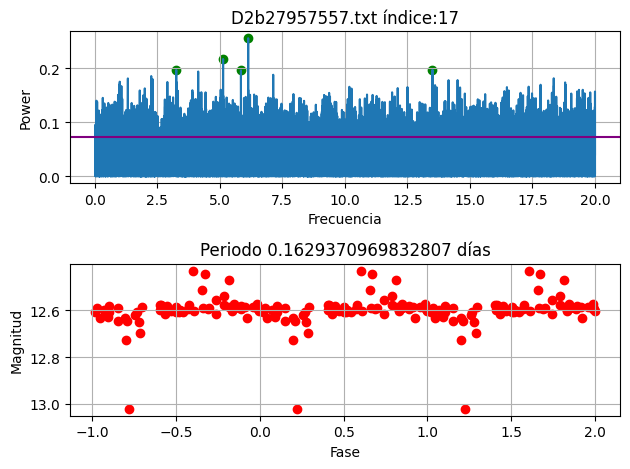

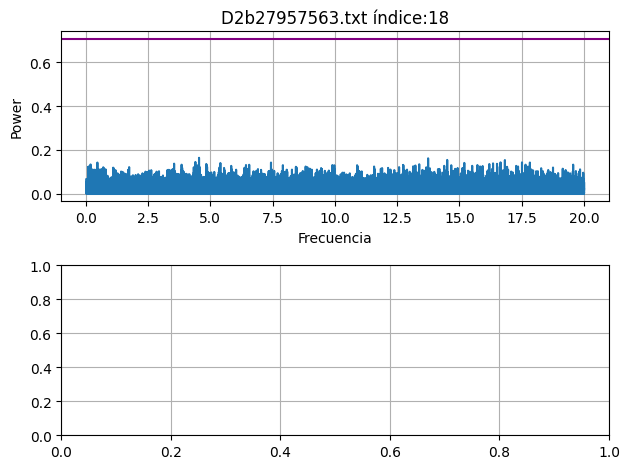

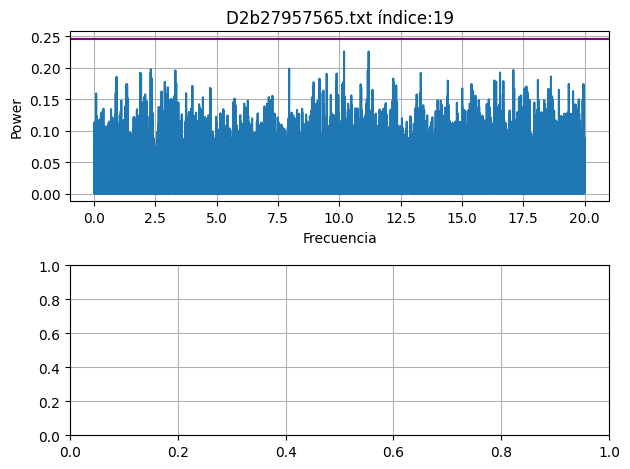

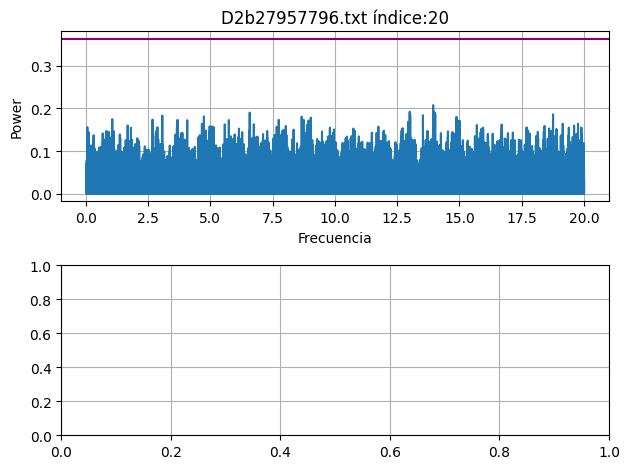

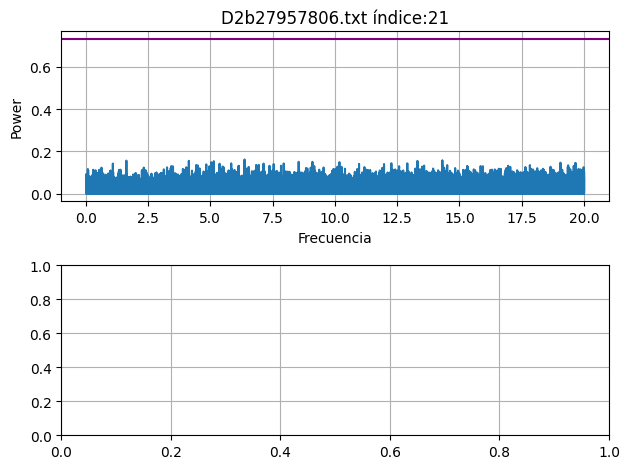

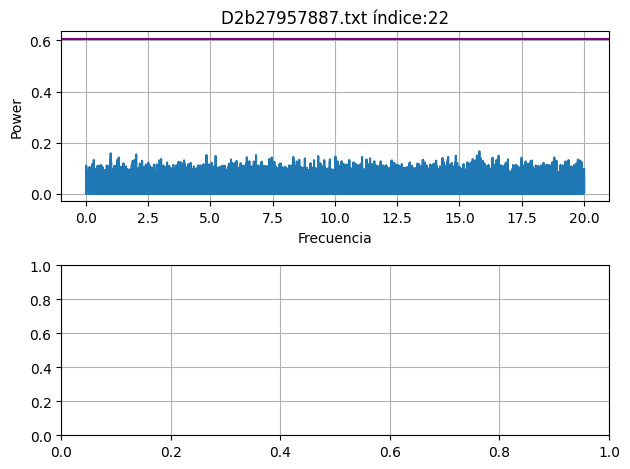

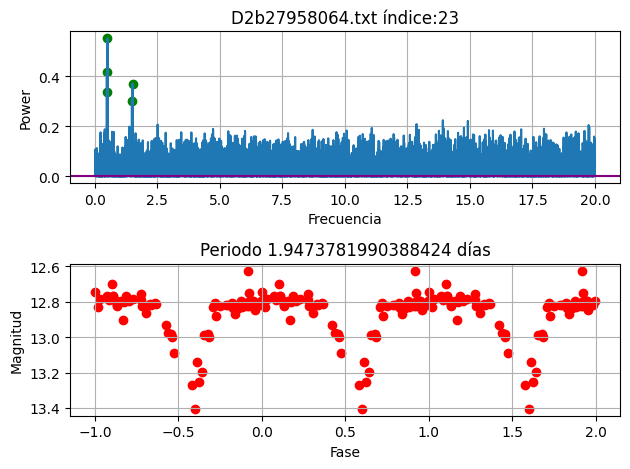

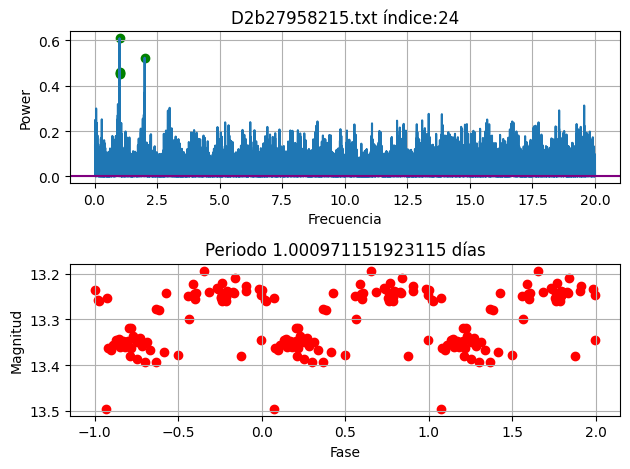

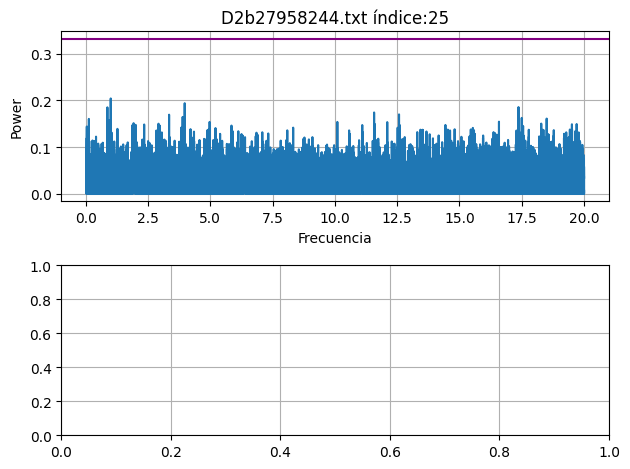

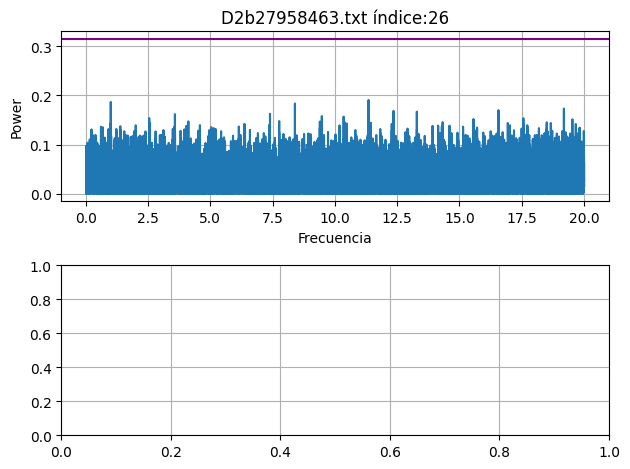

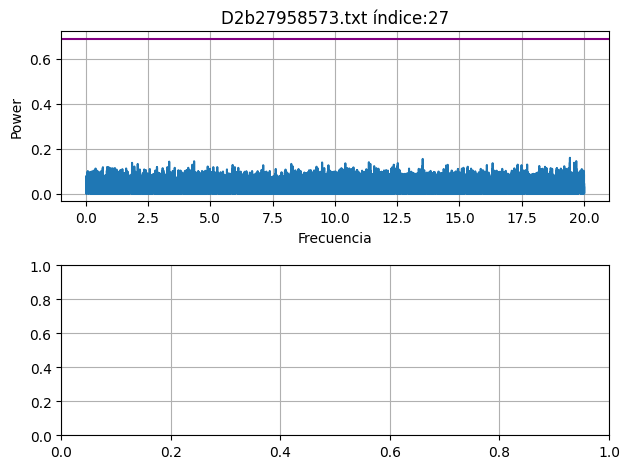

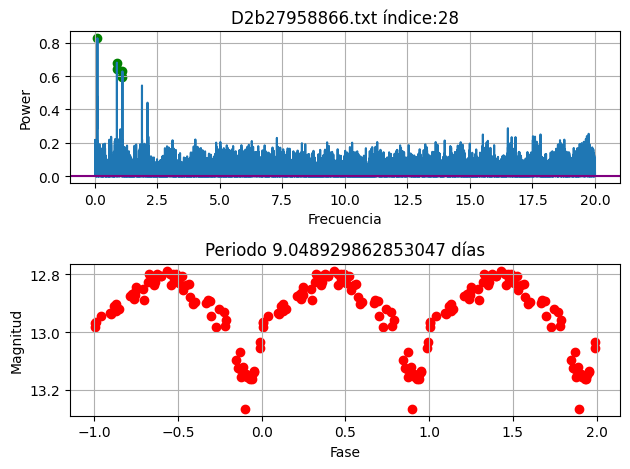

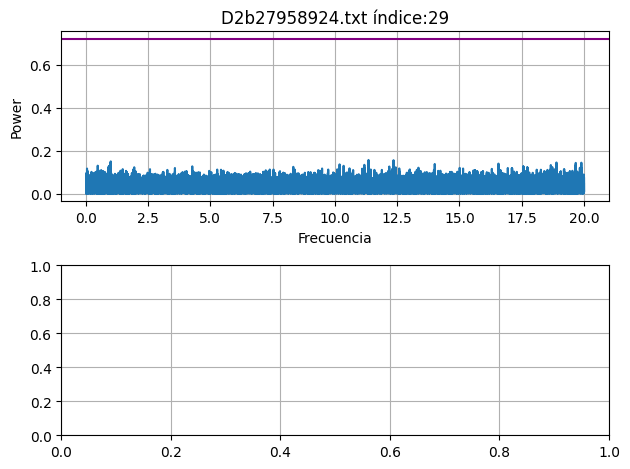

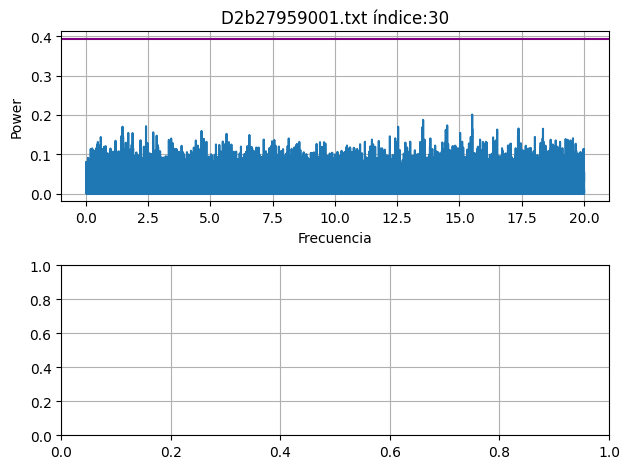

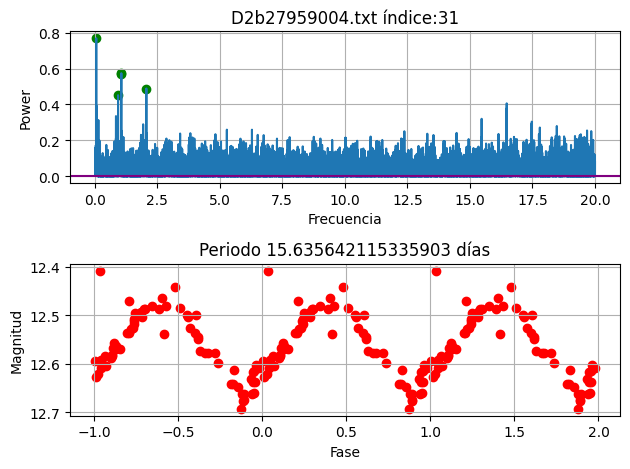

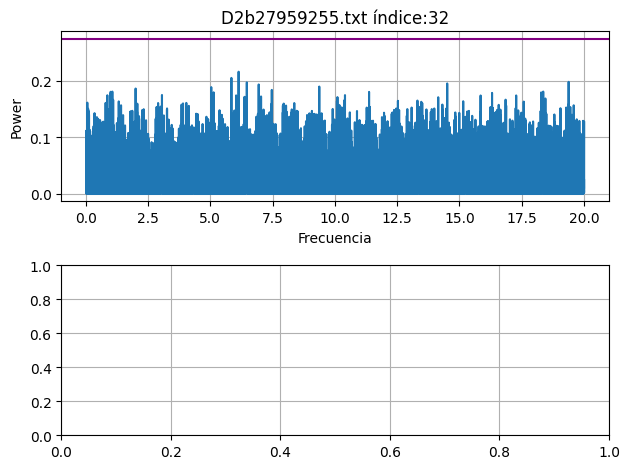

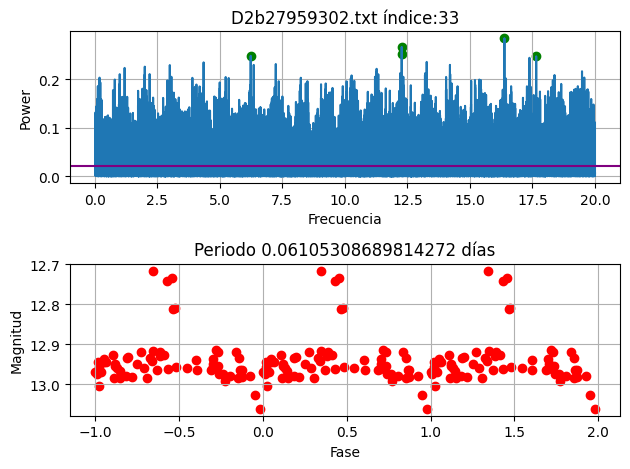

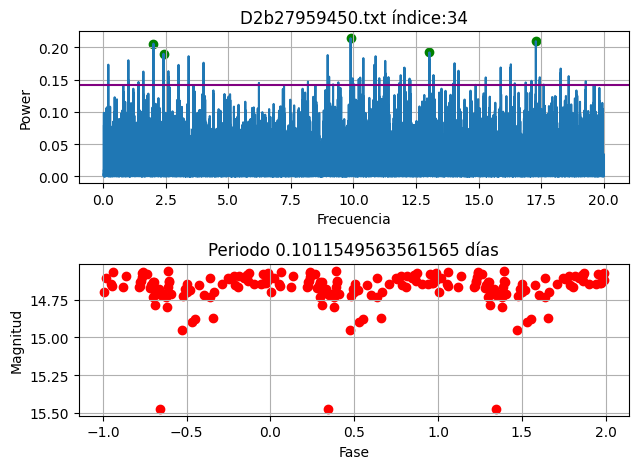

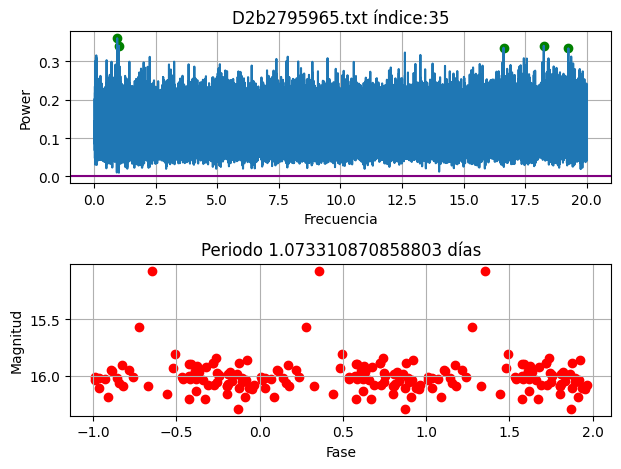

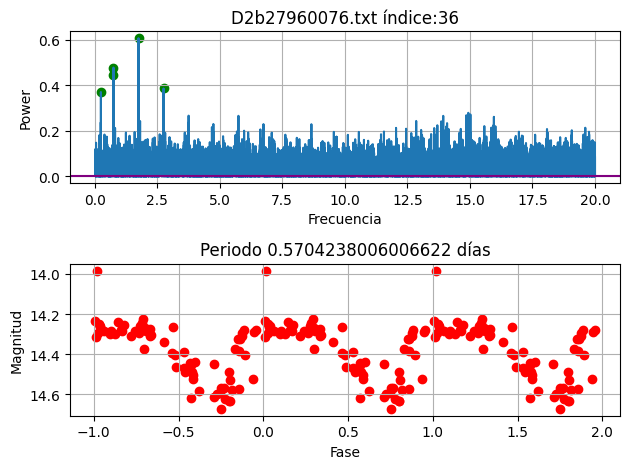

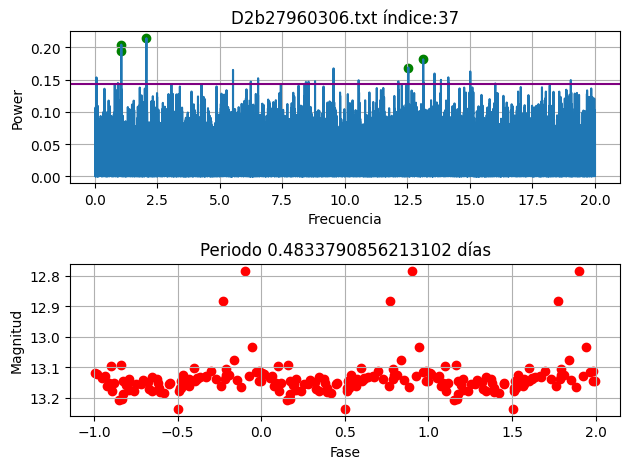

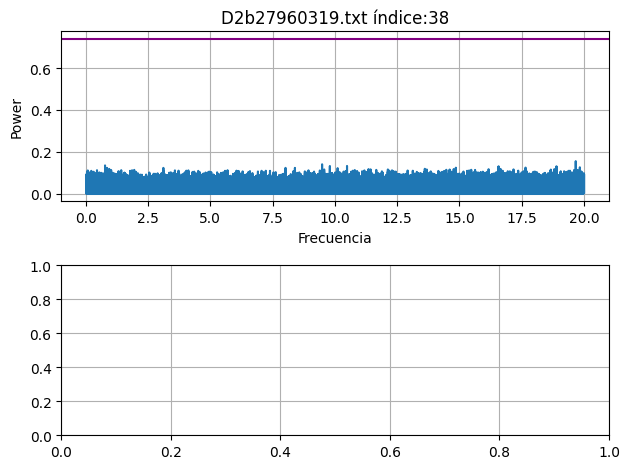

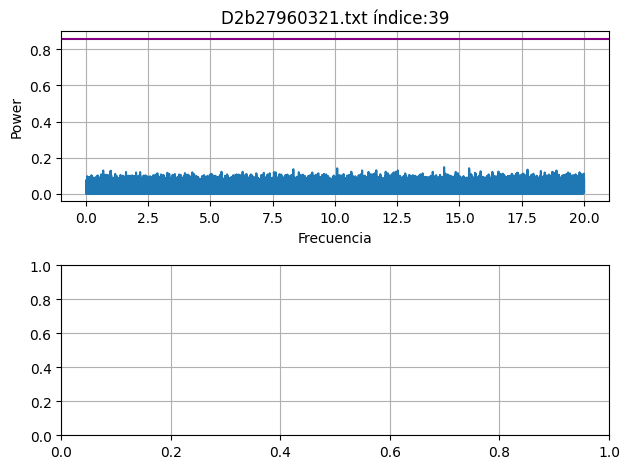

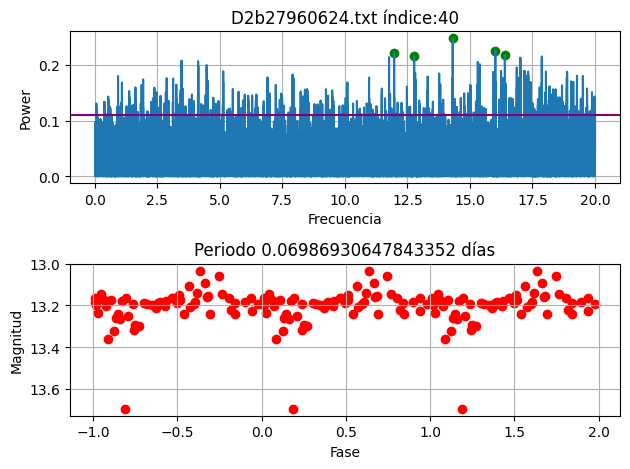

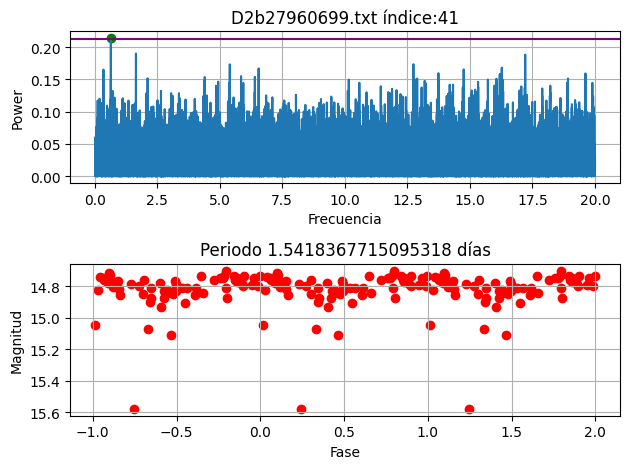

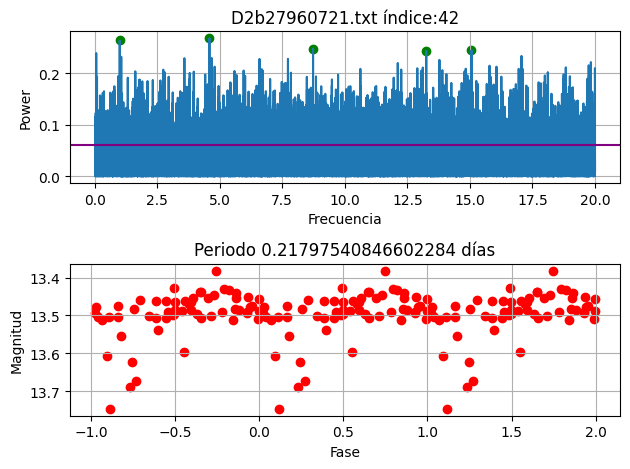

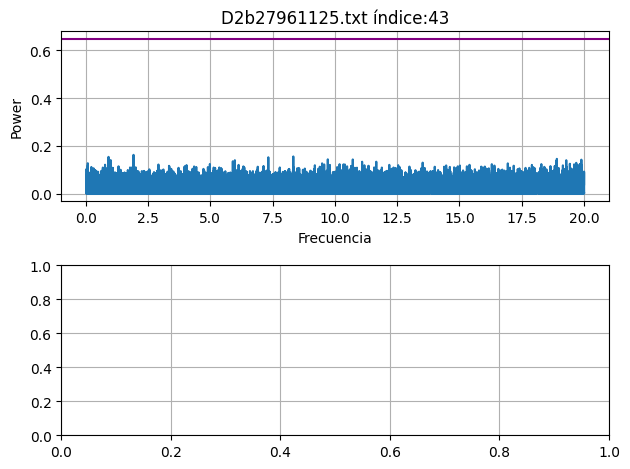

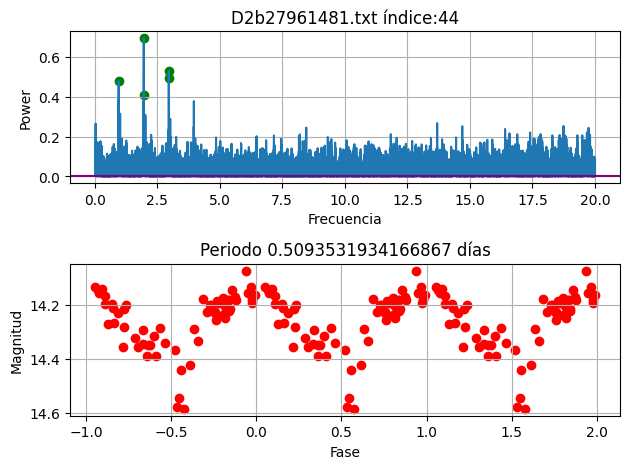

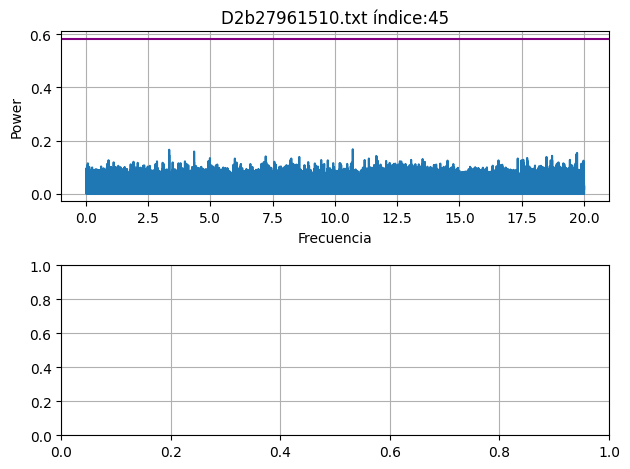

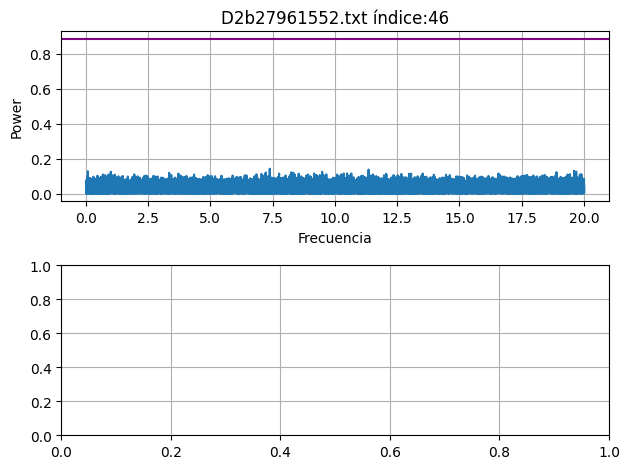

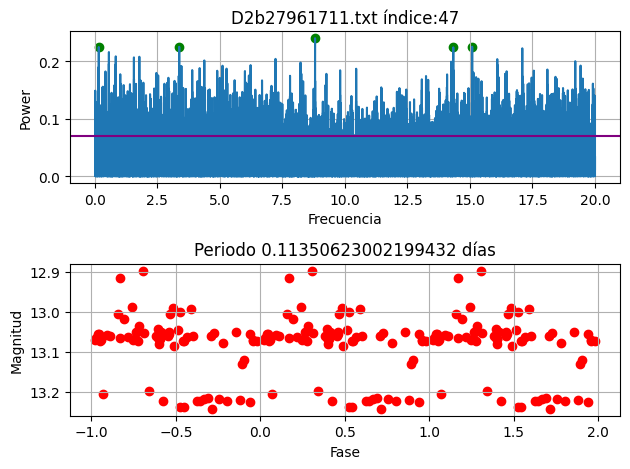

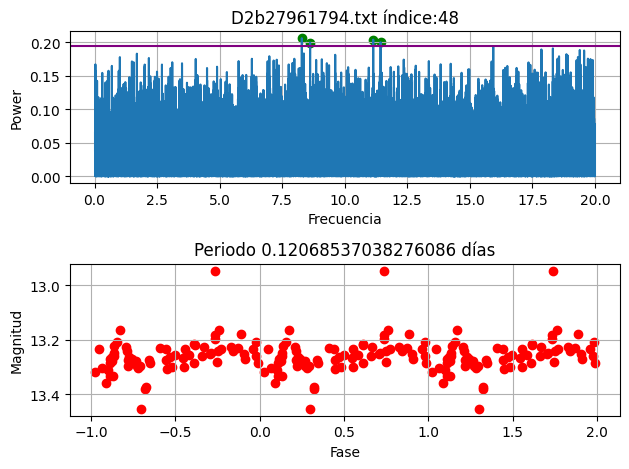

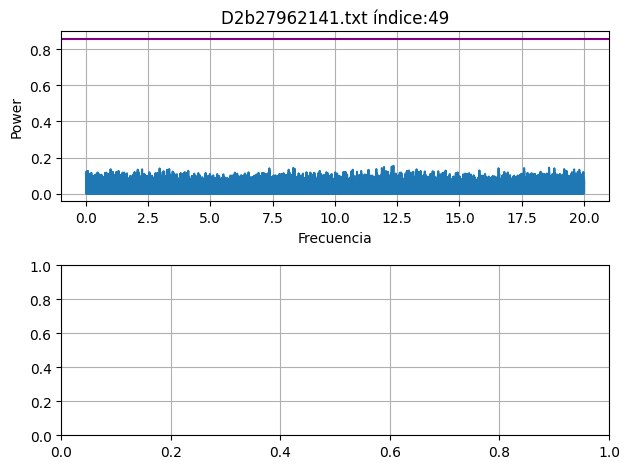

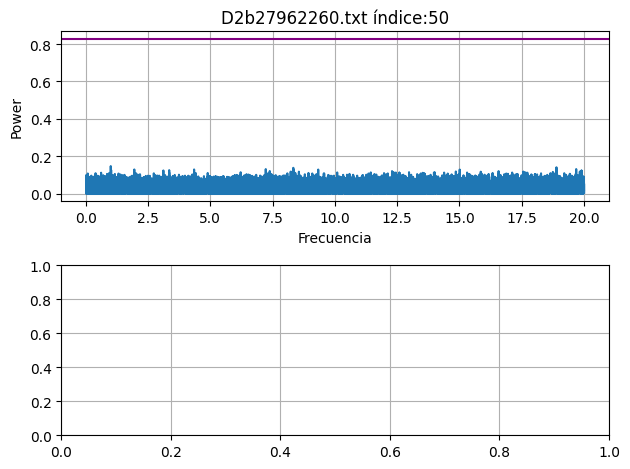

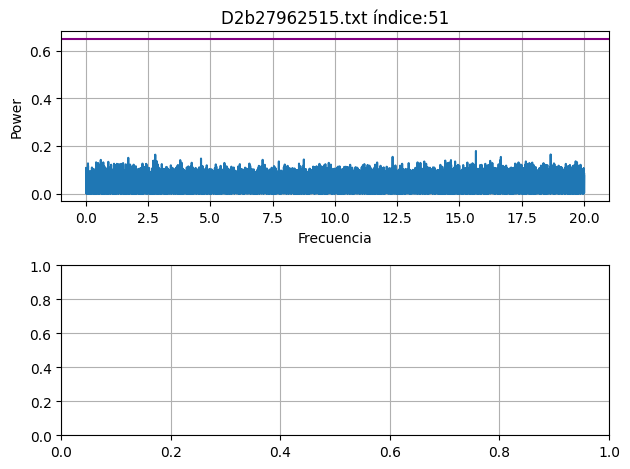

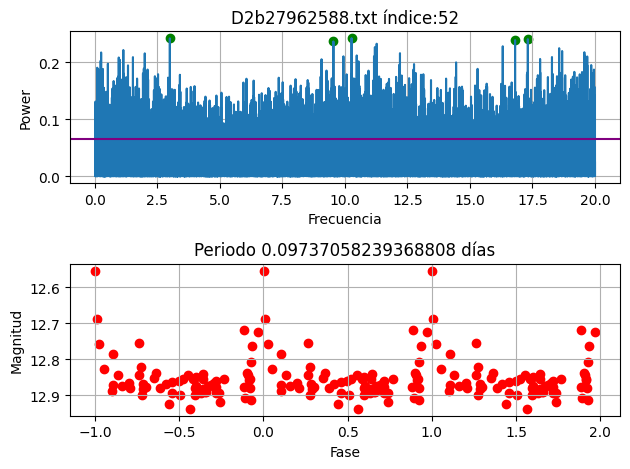

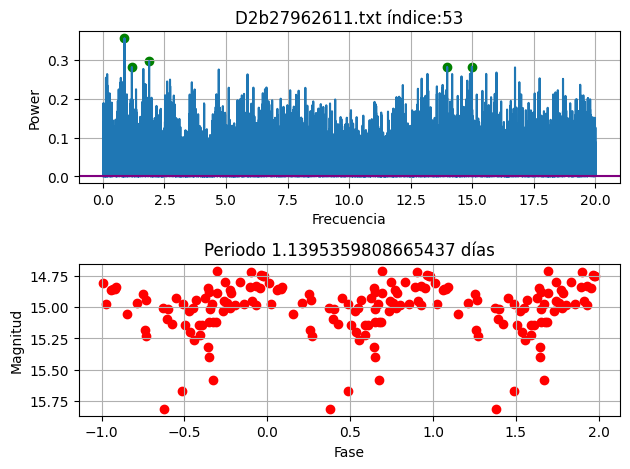

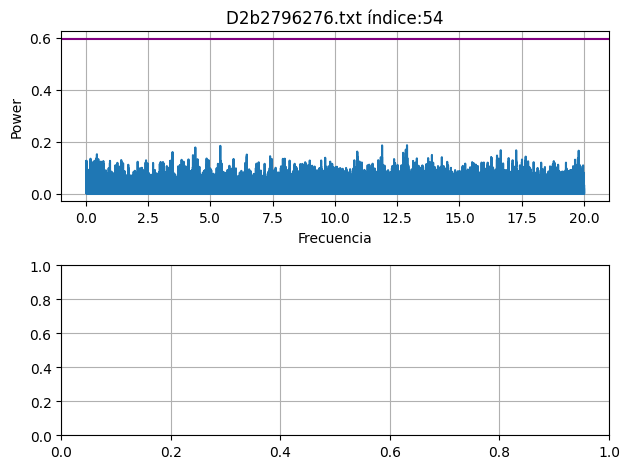

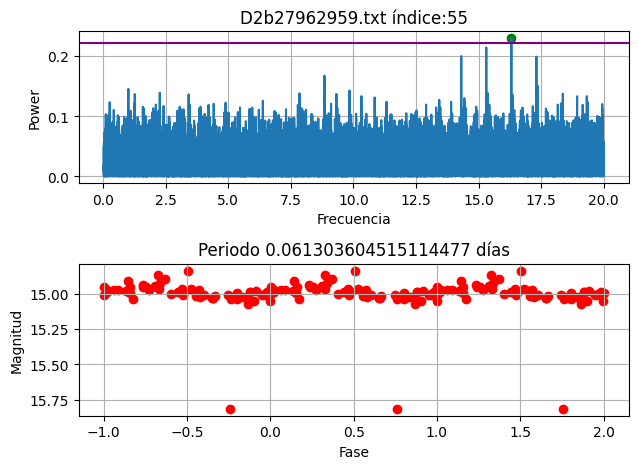

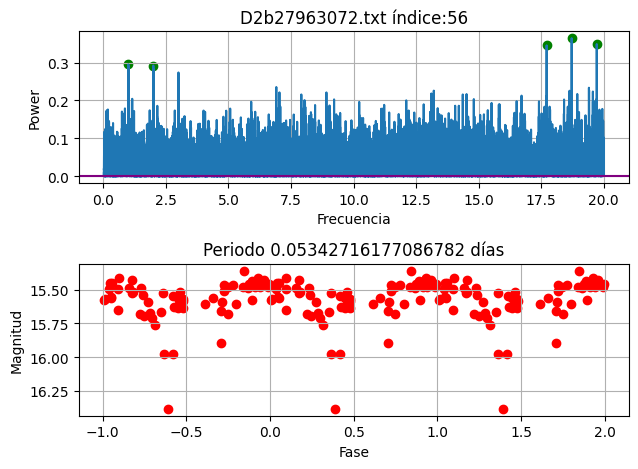

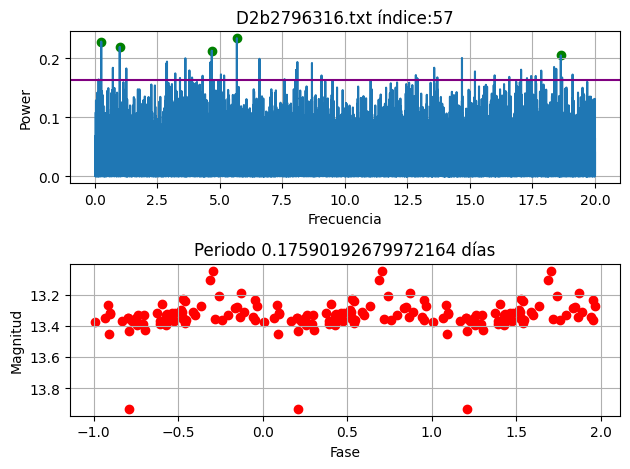

In [88]:
for i_freq,feq in enumerate(Frecuencias):
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(Frecuencias[i_freq],Power[i_freq])
    axs[0].axhline(Fap[i_freq], color='purple')
    axs[0].grid()

    axs[0].set_xlabel('Frecuencia')
    axs[0].set_ylabel('Power')
    axs[0].set_title(str(archivos[i_freq]) + ' índice:'+ str(i_freq))

    peaks, _ = find_peaks(Power[i_freq])
    powerpeaks=Power[i_freq][peaks]
    power_order=np.sort(powerpeaks)[::-1]
    n_peaks=5
    ind_peaks=[]
    Freq_peaks=[]
    Power_peaks=[]
    Periodo_peaks=[]
    i=0
    #filtered_stars = []
    indices_sirven = []
    stars_dict = {}
    while(i<n_peaks):
        if(power_order[i]>=Fap[i_freq]):
            ind_peaks=np.where(Power[i_freq]==power_order[i])[0][0]
            Freq_peaks.append(Frecuencias[i_freq][ind_peaks])
            Periodo_peaks.append(1/Freq_peaks[-1])
            Power_peaks.append(Power[i_freq][ind_peaks])
            #filtered_stars.append(archivos[i_freq])#[ind_peaks]) #[string for string, boolean in zip(archivos[i_freq], Periodo_peaks) if boolean]
        i=i+1
    axs[0].scatter(Freq_peaks,Power_peaks, color='g')
    #filtered_stars = [string for string, boolean in zip(archivos[i_freq], Power_peaks) if boolean]
    
    if(k[i_freq]<len(Periodo_peaks)):
        periodo=Periodo_peaks[k[i_freq]]
        Tie=(Tiempos[i_freq] % (periodo)) / (periodo)
        #filtered_stars.append(archivos[i_freq]) 
        #indices_sirven.append(Tie.index())
        #Tie = [phi(i, Tiempos[i_freq][0], Periodo[i_freq]) for i in Tiempos[i_freq]]
        #stars_dict.update({archivos[i_freq]:periodo})
        Tie=np.array(Tie)
        axs[1].scatter(Tie, Intensidad[i_freq],c="r")
        axs[1].scatter(Tie+1, Intensidad[i_freq],c="r")
        axs[1].scatter(Tie-1, Intensidad[i_freq],c="r")
        axs[1].set_title('Periodo ' + str(periodo) + ' días')
        axs[1].invert_yaxis()  # Voltea el eje y
        axs[1].set_xlabel('Fase')
        axs[1].set_ylabel('Magnitud')
    

    plt.tight_layout()
    plt.grid()

    
    plt.show()        

In [57]:
#indices_sirven
estrellas=[archivos[4],archivos[5], archivos[10], archivos[16], archivos[17], archivos[23], archivos[24], archivos[28], archivos[31], archivos[36], archivos[44], archivos[53]]
estrellas

['D2b27955172.txt',
 'D2b27955219.txt',
 'D2b27955905.txt',
 'D2b27957040.txt',
 'D2b27957557.txt',
 'D2b27958064.txt',
 'D2b27958215.txt',
 'D2b27958866.txt',
 'D2b27959004.txt',
 'D2b27960076.txt',
 'D2b27961481.txt',
 'D2b27962611.txt']

In [56]:
len(estrellas)

12

In [80]:
stars_dict

{'D2b2796316.txt': 0.17590192679972164}

In [58]:
import shutil

In [59]:
# Specify the target directory where you want to save the .txt files
target_directory = '/Users/valen/OneDrive/Documents/Universidad/7mo semestre/Cúmulos/Datos_sin_analizar_Vista/carpeta6_candidatos'

# Get a list of all .txt files in the source directory
#txt_files = glob.glob(os.path.join(source_directory, '*.txt'))

# Copy each .txt file to the target directory
for txt_file in estrellas:
    shutil.copy(txt_file, target_directory)

print(f"{len(estrellas)} .txt files copied to {target_directory}")

12 .txt files copied to /Users/valen/OneDrive/Documents/Universidad/7mo semestre/Cúmulos/Datos_sin_analizar_Vista/carpeta6_candidatos


In [91]:
estrellas_cefeidas = [archivos[23], archivos[24], archivos[28],archivos[31], archivos[53]]
# Specify the target directory where you want to save the .txt files
target_directory_cef = '/Users/valen/OneDrive/Documents/Universidad/7mo semestre/Cúmulos/Datos_sin_analizar_Vista/carpeta6_si'

# Get a list of all .txt files in the source directory
#txt_files = glob.glob(os.path.join(source_directory, '*.txt'))

# Copy each .txt file to the target directory
for txt_file in estrellas_cefeidas:
    shutil.copy(txt_file, target_directory_cef)

print(f"{len(estrellas_cefeidas)} .txt files copied to {target_directory_cef}")

5 .txt files copied to /Users/valen/OneDrive/Documents/Universidad/7mo semestre/Cúmulos/Datos_sin_analizar_Vista/carpeta6_si


In [92]:
estrellas_rlyrae = [archivos[2], archivos[4], archivos[11], archivos[12], archivos[36], archivos[44]]
# Specify the target directory where you want to save the .txt files
target_directory_lyrae = '/Users/valen/OneDrive/Documents/Universidad/7mo semestre/Cúmulos/Datos_sin_analizar_Vista/carpeta6_si/RR Lyrae'

# Get a list of all .txt files in the source directory
#txt_files = glob.glob(os.path.join(source_directory, '*.txt'))

# Copy each .txt file to the target directory
for txt_file in estrellas_rlyrae:
    shutil.copy(txt_file, target_directory_lyrae)

print(f"{len(estrellas_rlyrae)} .txt files copied to {target_directory_lyrae}")

6 .txt files copied to /Users/valen/OneDrive/Documents/Universidad/7mo semestre/Cúmulos/Datos_sin_analizar_Vista/carpeta6_si/RR Lyrae
